<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/%EA%B5%AD%EA%B0%80%EB%B3%84%EA%B3%B5%ED%95%AD%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2

df=pd.read_csv('./sample_data/airport - airport.csv', encoding='UTF8')
df.columns = ['ID', '공항이름', '도시', '나라','IATA', 'ICAO','위도','경도']
df


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

,ID,공항이름,도시,나라,IATA,ICAO,위도,경도
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001
...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198


In [3]:
df_airport=df.groupby('나라').count()

In [4]:
df_airport.dtypes

ID      int64
공항이름    int64
도시      int64
IATA    int64
ICAO    int64
위도      int64
경도      int64
dtype: object

In [5]:
df_airport = df_airport.sort_values(by = '공항이름', ascending = False) # ascending = False 내림차순
df_airport

,ID,공항이름,도시,IATA,ICAO,위도,경도
나라,,,,,,,
United States,1512,1512,1512,1512,1512,1512,1512
Canada,430,430,430,430,430,430,430
Australia,334,334,304,334,334,334,334
Russia,264,264,262,264,264,264,264
Brazil,264,264,264,264,264,264,264
...,...,...,...,...,...,...,...
Cocos (Keeling) Islands,1,1,1,1,1,1,1
Christmas Island,1,1,1,1,1,1,1
Niue,1,1,1,1,1,1,1


In [6]:
df_airport.columns

Index(['ID', '공항이름', '도시', 'IATA', 'ICAO', '위도', '경도'], dtype='object')

In [7]:
df_airporttop20=df_airport.head(20)
df_airporttop20

,ID,공항이름,도시,IATA,ICAO,위도,경도
나라,,,,,,,
United States,1512,1512,1512,1512,1512,1512,1512
Canada,430,430,430,430,430,430,430
Australia,334,334,304,334,334,334,334
Russia,264,264,262,264,264,264,264
Brazil,264,264,264,264,264,264,264
Germany,249,249,249,249,249,249,249
China,241,241,240,241,241,241,241
France,217,217,217,217,217,217,217
United Kingdom,167,167,167,167,167,167,167


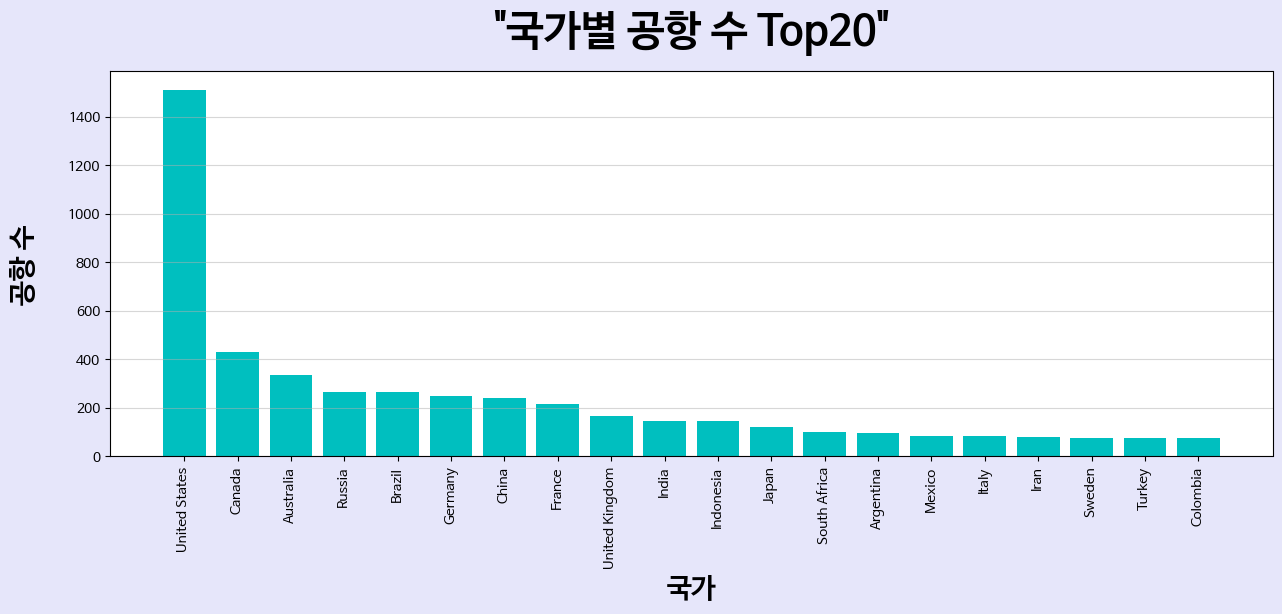

In [8]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df_airporttop20.index  # 상위20개국
y = df_airporttop20['공항이름']   # 공항수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'c')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"국가별 공항 수 Top20"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('국가', fontdict = {'size': 20, 'color': 'black', 'weight': 'bold'})
plt.ylabel('공항 수', fontdict = {'size': 20, 'color': 'black', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 90)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

In [9]:
# 파일명 지정하여 저장하기
file = './sample_data/airporttop20.csv'  # 파일명
df_airporttop20.to_csv(file, encoding = 'UTF8', mode = 'w') # 파일 저장하기

In [10]:
!pip install wordcloud

{'United States': 1512, 'Canada': 430, 'Australia': 334, 'Russia': 264, 'Brazil': 264, 'Germany': 249, 'China': 241, 'France': 217, 'United Kingdom': 167, 'India': 148, 'Indonesia': 145, 'Japan': 123, 'South Africa': 99, 'Argentina': 96, 'Mexico': 84, 'Italy': 83, 'Iran': 82, 'Sweden': 77, 'Turkey': 76, 'Colombia': 75}


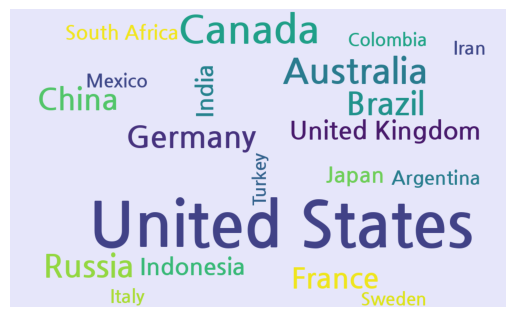

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_airporttop20.index     # 국가
counts = df_airporttop20['공항이름']  # 공항수
data = dict(zip(names, counts)) # 워드클라우드는 <<딕셔너리>> 형태로 만들기
print(data) # 딕셔너리 형태인지 확인

# 3.워드클라우드 그래프로 시각화하기 / 데이터는 딕셔너리 형태만 가능
wc = WordCloud(width = 1000, height = 600,
               background_color="lavender", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('./sample_data/국가별공항수Top20.png')

In [17]:
df2=pd.read_csv('./sample_data/world-data-2023.csv', encoding='UTF8')
df2.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [18]:
df2_area=df2[['Country','Land Area(Km2)','Population']]
df2_area

,Country,Land Area(Km2),Population
0,Afghanistan,"652,230","38,041,754"
1,Albania,"28,748","2,854,191"
2,Algeria,"2,381,741","43,053,054"
3,Andorra,468,"77,142"
4,Angola,"1,246,700","31,825,295"
...,...,...,...
190,Venezuela,"912,050","28,515,829"
191,Vietnam,"331,210","96,462,106"
192,Yemen,"527,968","29,161,922"
193,Zambia,"752,618","17,861,030"
